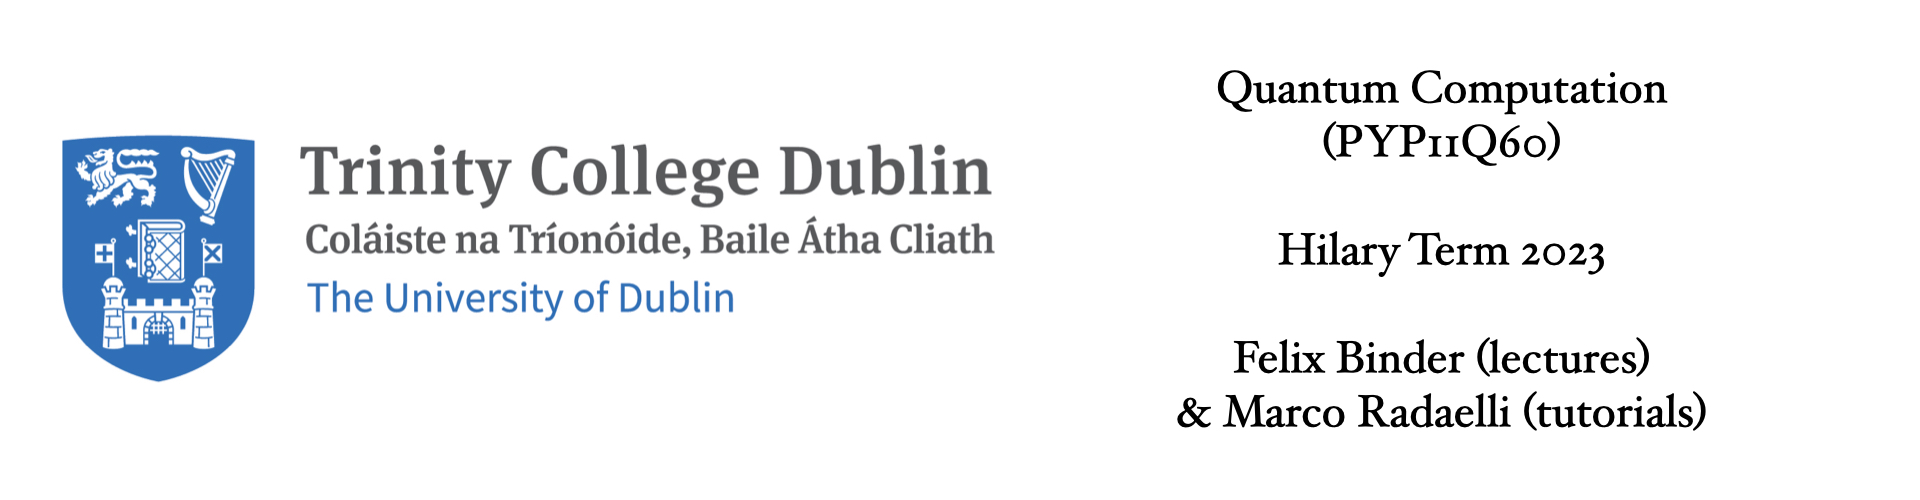

# Problem set 4 Name : Benjamin Stott ID: 18336161
### some parts are in latex while others are handwritten since I only figured them out( I think? ) last minute

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit

<a id="reflection"></a>
# 4.1 - Inside the reflection operator (4 pts.)
In the lecture, we defined the reflection operator ${R}$ as
$$ {R} = 2\ket{\psi}\bra{\psi} - \mathbb{I},$$
where $\ket{\psi}$ is the equal superposition of all states, given by
$$ \ket{\psi} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x}.$$
<ol>
    <li> Create a Python function <code>generate_reflection(number_qubits)</code> which outputs a Qiskit quantum gate that performs the reflection operator on <code>number_qubits</code> qubits. Draw the quantum circuit yielding the gate for <code>number_qubits</code>=1, 2, 5.</li>
    <li> Prove that the operator ${R}$, applied to a generic state
    $$ \ket{\phi} = \sum_k \alpha_k \ket{k},$$
    produces the output state 
    $$\sum_k \left[-\alpha_k + 2 \overline\alpha \right]\ket{k},$$
    where 
    $$\overline\alpha := \sum_k \frac{\alpha_k}{N}.$$
         </li>
</ol>

# was not sure whether the operator explicitly taken as a gate or one built up was required so I did both below

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.extensions import UnitaryGate
from qiskit import Aer


def equal_superposition_state(number_qubits):
    N = 2 ** number_qubits
    state = np.zeros(N, dtype=complex)
    for x in range(N):
        state[x] = 1 / np.sqrt(N)
    return state

def reflection_matrix(number_qubits):
    N = 2 ** number_qubits
    psi = equal_superposition_state(number_qubits)
    I = np.eye(N)
    R = 2 * np.outer(psi, psi.conj()) - I
    return R

def generate_reflection(number_qubits):
    R = reflection_matrix(number_qubits)
    return UnitaryGate(R, label='R')

# Draw the quantum circuit for number_qubits = 1, 2, 5
for number_qubits in [1, 2, 5]:
    qr = QuantumRegister(number_qubits)
    qc = QuantumCircuit(qr)
    qc.append(generate_reflection(number_qubits), qr)
    print(f'Reflection operator for {number_qubits} qubits:')
    print(qc.draw())


Reflection operator for 1 qubits:
    ┌───┐
q0: ┤ R ├
    └───┘
Reflection operator for 2 qubits:
      ┌────┐
q1_0: ┤0   ├
      │  R │
q1_1: ┤1   ├
      └────┘
Reflection operator for 5 qubits:
      ┌────┐
q2_0: ┤0   ├
      │    │
q2_1: ┤1   ├
      │    │
q2_2: ┤2 R ├
      │    │
q2_3: ┤3   ├
      │    │
q2_4: ┤4   ├
      └────┘


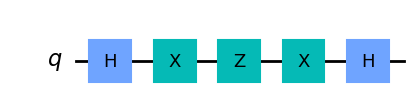

Reflection operator for 1 qubits:


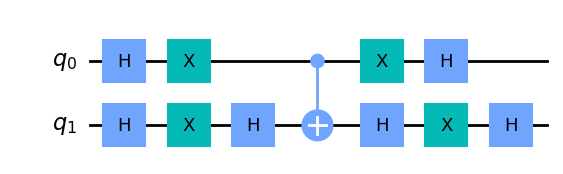

Reflection operator for 2 qubits:


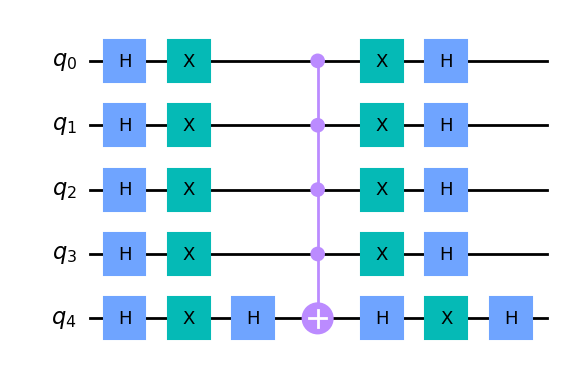

Reflection operator for 5 qubits:


In [3]:
def reflection_operator(n_qubits):
    qc = QuantumCircuit(n_qubits)

    qc.h(range(n_qubits))
    qc.x(range(n_qubits))
    
    if n_qubits == 1:
        qc.z(0)
    else:
        qc.h(n_qubits - 1)
        qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
        qc.h(n_qubits - 1)
    
    qc.x(range(n_qubits))
    qc.h(range(n_qubits))
    display(qc.draw('mpl'))
    reflection_op = qc.to_gate()
    reflection_op.name = "Reflection"
    
    return reflection_op

for number_qubits in [1, 2, 5]:
    qr = QuantumRegister(number_qubits)
    qc = QuantumCircuit(qr)
    qc.append(reflection_operator(number_qubits), qr)
    print(f'Reflection operator for {number_qubits} qubits:')



$$(2\ket{\psi}\bra{\psi}-I)\displaystyle\sum_k\alpha_k\ket{k}=$$

$$\sum_k 2\alpha_k\ket{\psi}\braket{\psi|k}-\alpha_k\ket{k}=$$

$$\sum_{x_1}\sum_{x_2}\sum_k 2 \frac{\alpha_k}{N}\ket{x_1}\braket{x_2|k}-\alpha_k\ket{k}=$$

$$\sum_{x_1}2\langle{\alpha}\rangle\ket{x_1}-\sum_k\alpha_k\ket{k}=$$

$$ 2\braket{\alpha}\sum_{x_1}\ket{x_1}-\sum_k\alpha_k\ket{k}=$$
$$ 2\braket{\alpha}\sum_{k}\ket{k}-\sum_k\alpha_k\ket{k}=\\ $$


$$ \mathcal{R} \ket{\phi} = \sum_k \left(-\alpha_k + 2 \overline{\alpha} \right) \ket{k} $$

Where we have relabeled, x_1 to k as both are the basis vectors of the vector space.

# 4.2 - A Quantum Sudoku (5 pts. total)
In this exercise, we will use the Quantum Search protocol to solve a simplified version of the popular puzzle game <it>Sudoku</it>. In particular, we will consider a $2\times 2$ Sudoku, which is a table like this:

|   |   |
|---|---|
|$v_0$| $v_1$ |
| $v_2$ | $v_3$ |

where $v_j \in \{0,1\}$ for all $j$.

A sudoku is <b>valid</b> if and only if no symbol appears more than once in each row and in each column. In other words, we require that $v_0 \neq v_1$, $v_1 \neq v_3$, $v_2 \neq v_3$ and $v_0 \neq v_2$.

## 4.2.a Classical version (0.5 pt.)
<ol>
    <li>Prove that, once one of $v_0$, $v_1$, $v_2$ and $v_3$ is specified, the scheme is fully determined.</li>
    <li>Are all the inequality conditions above independent? Is it possible to use a smaller number of conditions? Comment on this.</li>
    <li>Write a Python function <code>sudoku_solver</code> that takes binary inputs <code>value</code> and <code>cell_index</code> and outputs solution of the game.</li></ol>


Let's assume one of the variables $v_0$, $v_1$, $v_2$, or $v_3$ is specified. Without loss of generality, let $v_0$ be the specified variable. We will show that the other variables are uniquely determined.

As per the validity conditions of the $2 \times 2$ Sudoku, we have:

1. $v_0 \neq v_1$
2. $v_0 \neq v_2$
3. $v_1 \neq v_3$
4. $v_2 \neq v_3$

Since $v_0$ is specified and there are only two possible values (0 or 1), we can uniquely determine $v_1$ and $v_2$ using the first two conditions:

- If $v_0 = 0$, then $v_1 = 1$ and $v_2 = 1$.
- If $v_0 = 1$, then $v_1 = 0$ and $v_2 = 0$.

Now that $v_1$ and $v_2$ are determined, we can use the fourth condition to find $v_3$:

- If $v_1 = 1$ and $v_2 = 1$, then $v_3 = 0$.
- If $v_1 = 0$ and $v_2 = 0$, then $v_3 = 1$.

Thus, specifying one of the variables uniquely determines the other variables, and the Sudoku scheme is fully determined.



All the inequality conditions are independent and necessary for a valid $2\times 2$ Sudoku. These conditions ensure that no symbol appears more than once in each row and each column. Removing any of these conditions would allow for the possibility of duplicate symbols in either a row or a column, resulting in an invalid Sudoku configuration. Therefore, it is not possible to use a smaller number of conditions without compromising the validity of the Sudoku.

In [4]:
def sudoku_solver(value, cell_index):
    # Given a value (0 or 1) and the index of the cell (0, 1, 2, or 3), returns the solution
    if cell_index == 0:
        v0 = value
    elif cell_index == 1:
        v1 = value
    elif cell_index == 2:
        v2 = value
    else: # cell_index == 3
        v3 = value

    # Determine the other values based on the provided cell value
    if cell_index == 0:
        v1 = 1 - v0
        v2 = 1 - v0
        v3 = v0
    elif cell_index == 1:
        v0 = 1 - v1
        v2 = 1 - v1
        v3 = v1
    elif cell_index == 2:
        v0 = 1 - v2
        v1 = 1 - v2
        v3 = v2
    else: # cell_index == 3
        v0 = 1 - v3
        v1 = v3
        v2 = v3

    return v0, v1, v2, v3

# Example usage
value = 0
cell_index = 0
solution = sudoku_solver(value, cell_index)
print(solution)


(0, 1, 1, 0)


## 4.2.b A reversible solution checker (1 pts.)
The first step towards our quantum sudoku solver is to create a reversible logic to check whether a proposed solution is valid or not. In particular, we need to be able to test whether two given items are different, and this can be checked using a <code>XOR</code> gate.

Create a quantum circuit $\mathcal{X}$ performing a <code>XOR</code> gate on three qubits in this way:
$$\mathcal{X} \ket{a}\ket{b}\ket{c} = \ket{a}\ket{b}\ket{c \oplus XOR(a,b)}$$
Transform the circuit into a gate named <code>rXOR</code>.

In [5]:
from qiskit import QuantumCircuit, QuantumRegister

def rXOR_gate():
    rXOR_circuit = QuantumCircuit(3, name='rXOR')

    # Perform XOR on qubits 0 and 1, store the result in qubit 2
    rXOR_circuit.cx(0, 2)
    rXOR_circuit.cx(1, 2)
 #   display(rXOR_circuit.draw('mpl'))
    # Transform the circuit into a gate
    rXOR = rXOR_circuit.to_gate()
    return rXOR

# Test the rXOR gate
qr = QuantumRegister(3)
test_circuit = QuantumCircuit(qr)
test_circuit.append(rXOR_gate(), qr[:])

print("rXOR gate circuit:")
print(test_circuit.draw())


rXOR gate circuit:
      ┌───────┐
q6_0: ┤0      ├
      │       │
q6_1: ┤1 rXOR ├
      │       │
q6_2: ┤2      ├
      └───────┘


## 4.2.c Building the oracle /1 (0.5 pt.)
We will have to apply the solution checker four times to check the validity of a sudoku. We will store the result of the four checks in four qubits (each one of them will assume value 1 if the check is passed). The sudoku is valid if and only if all the check qubits are in state $\ket{1}$. We can use a fifth "general-control" qubit to check if all the check qubits are in $\ket{1}$. Here, a multi-controlled Toffoli gate can prove useful (see <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.mct.html">here</a>). 

Build a circuit which checks all the four conditions, putting the outcomes of the checks into four check qubits, and then verifies if all the conditions are met, storing the result in a further qubit. 

In [6]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import MCMT

def sudoku_oracle():
    # Create a quantum circuit with 9 qubits
    qc = QuantumCircuit(9, name='sudoku_oracle')
    
    # Create the rXOR gate
    rXOR = rXOR_gate()
    
    # Check condition 1 (v_0 != v_1) and store result in check qubit 4
    qc.append(rXOR, [0, 1, 4])
    
    # Check condition 2 (v_1 != v_3) and store result in check qubit 5
    qc.append(rXOR, [1, 3, 5])
    
    # Check condition 3 (v_2 != v_3) and store result in check qubit 6
    qc.append(rXOR, [2, 3, 6])
    
    # Check condition 4 (v_0 != v_2) and store result in check qubit 7
    qc.append(rXOR, [0, 2, 7])
    
    # Verify if all conditions are met (all check qubits are in |1>)
    # Use multi-controlled Toffoli gate (MCMT) and store the result in the general-control qubit (qubit 8)
    qc.mct([4, 5, 6, 7], 8)
    
    return qc

# Test the sudoku oracle
sudoku_oracle_circuit = sudoku_oracle()
print("Sudoku oracle circuit:")
print(sudoku_oracle_circuit.draw())


Sudoku oracle circuit:
     ┌───────┐                  ┌───────┐     
q_0: ┤0      ├──────────────────┤0      ├─────
     │       │┌───────┐         │       │     
q_1: ┤1      ├┤0      ├─────────┤       ├─────
     │       ││       │┌───────┐│       │     
q_2: ┤  rXOR ├┤       ├┤0      ├┤1      ├─────
     │       ││       ││       ││       │     
q_3: ┤       ├┤1 rXOR ├┤1      ├┤       ├─────
     │       ││       ││       ││  rXOR │     
q_4: ┤2      ├┤       ├┤  rXOR ├┤       ├──■──
     └───────┘│       ││       ││       │  │  
q_5: ─────────┤2      ├┤       ├┤       ├──■──
              └───────┘│       ││       │  │  
q_6: ──────────────────┤2      ├┤       ├──■──
                       └───────┘│       │  │  
q_7: ───────────────────────────┤2      ├──■──
                                └───────┘┌─┴─┐
q_8: ────────────────────────────────────┤ X ├
                                         └───┘


## 4.2.d Building the oracle /2 (1 pt.)
Our circuit is not yet ready to function as an oracle. In fact, we would like to have an oracle $\mathcal{U}$ such that:
$$\mathcal{U} \ket{x}\ket{0}\ket{\mbox{out}_0} = \ket{x}\ket{0}\ket{\mbox{out}_0\oplus f(x)}$$
We therefore need to modify the circuit in order to restore the intermediate qubits set to $\ket{0}$ (the check qubits). Modify the previous circuit in order to reset the values to zero (avoid using <code>reset</code> instructions in order to preserve unitarity). Transform the circuit into a gate. This will be our oracle.

In [7]:
def sudoku_oracle_gate():
    # Create a quantum circuit with 9 qubits
    qc = QuantumCircuit(9, name='U')
    
    # Create the rXOR gate
    rXOR = rXOR_gate()
    
    # Check conditions and store results in check qubits (4 to 7)
    qc.append(rXOR, [0, 1, 4])
    qc.append(rXOR, [1, 3, 5])
    qc.append(rXOR, [2, 3, 6])
    qc.append(rXOR, [0, 2, 7])
    
    # Verify if all conditions are met (all check qubits are in |1>)
    # Use multi-controlled Toffoli gate (MCMT) and store the result in the general-control qubit (qubit 8)
    qc.mct([4, 5, 6, 7], 8)
    
    # Reset check qubits by reapplying the rXOR_gate
    qc.append(rXOR, [0, 2, 7])
    qc.append(rXOR, [2, 3, 6])
    qc.append(rXOR, [1, 3, 5])
    qc.append(rXOR, [0, 1, 4])
 #   display(qc.draw('mpl'))
    # Transform the circuit into a gate
    sudoku_oracle = qc.to_gate()
    return sudoku_oracle

# Test the sudoku oracle gate
qr = QuantumRegister(9)
test_circuit = QuantumCircuit(qr)
test_circuit.append(sudoku_oracle_gate(), qr[:])

print("Modified sudoku oracle circuit:")
print(test_circuit.draw())


Modified sudoku oracle circuit:
      ┌────┐
q7_0: ┤0   ├
      │    │
q7_1: ┤1   ├
      │    │
q7_2: ┤2   ├
      │    │
q7_3: ┤3   ├
      │    │
q7_4: ┤4 U ├
      │    │
q7_5: ┤5   ├
      │    │
q7_6: ┤6   ├
      │    │
q7_7: ┤7   ├
      │    │
q7_8: ┤8   ├
      └────┘


## 4.2.e Quantum search (1 pt.)
It is now possible to apply the Quantum Search protocol to the sudoku. 

Write a Quantum Search algorithm to find the solutions for our $2\times 2$ Sudoku. Plot the outcome of the measurements and comment on the outcomes with highest probabilities.

The optimal solution is usually not found with 100% probability, especially on real (noisy) quantum hardware. Explain (in no more than 3 sentences) why this is not a fundamental issue here, using concepts from complexity theory and complexity classes. 

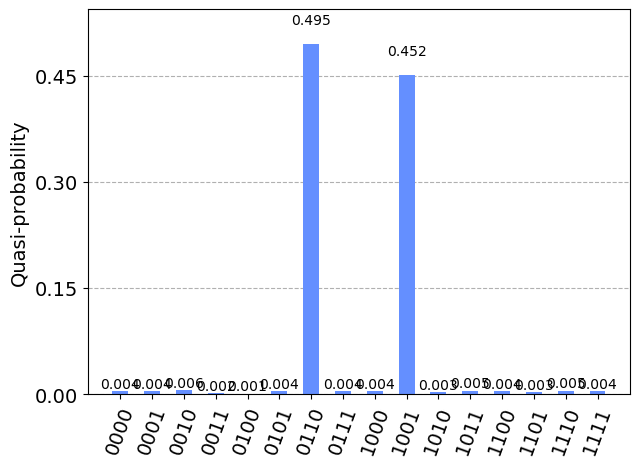

In [8]:
def reflection_operator(n_qubits):
    qc = QuantumCircuit(n_qubits)

    qc.h(range(n_qubits))
    qc.x(range(n_qubits))
    qc.h(n_qubits - 1)
    qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
    qc.h(n_qubits - 1)
    qc.x(range(n_qubits))
    qc.h(range(n_qubits))
        
    reflection_op = qc.to_gate()
    reflection_op.name = "Reflection"
    
    return reflection_op

n_iterations = 2
n_qubits = 9

grover_circuit = QuantumCircuit(n_qubits, 4)

# Initialize the first 4 qubits to equal superposition
grover_circuit.h(range(4))

# Initialize the ancilla qubit (qubit 8) to |-⟩
grover_circuit.x(8)
grover_circuit.h(8)

# Apply the oracle and the reflection operator
for _ in range(n_iterations):
    grover_circuit.append(sudoku_oracle_gate(), range(n_qubits))
    grover_circuit.append(reflection_operator(4), range(4))


grover_circuit.measure(range(4), range(4))
from qiskit import *

backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram


probabilities = {}
for key, value in counts.items():
    probabilities[key] = value / 1000
    
plot_histogram(probabilities)

The non-100% probability of finding the optimal solution in quantum search algorithms is not a fundamental issue because Sudoku, as an NP-complete problem, does not require perfect solutions every time. Instead, it focuses on finding a feasible solution in a more efficient manner than classical algorithms. Quantum search algorithms provide significant speedup over their classical counterparts, making them suitable for tackling NP-complete problems like Sudoku even without a guaranteed optimal solution in every run.

# 4.3 - Quantum Search on graphs (6 pts. total)

It is possible to set the Quantum Search algorithm on a suitably defined graph. In this exercise, you will employ a <b>continuous-time quantum walk</b> to solve a search problem. Consider a set $B$ of vertices of the graph that represents the possible solutions to be identified. Employing a suitably defined Hamiltonian, it will be possible to obtain that set.

Recall the definition of an undirected graph's adjacency matrix $A$:
$$A_{ij} = \begin{cases}1 & \mbox{ if nodes i and j are connected} \\ 0 & \mbox{ otherwise}\end{cases}.$$
We call an undirectd graph **complete** if any pair of its vertices are connected by an edge.

In addition to $A$, consider the degree matrix $D$, which is a diagonal matrix whose element $D_{ii}$ corresponds to the degree of vertex $i$, i.e. the number of the vertices connected to it. In the present case, it will be
$$ D_{ij} = \begin{cases} (N-1) & \mbox{ if } i=j \\ 0 & \mbox{otherwise}\end{cases},$$
where $N$ is the total number of vertices in the graph. Finally, the Laplacian matrix of the graph is the difference:
$$ L = A - D.$$

## 4.3.a Hermiticity of the Laplacian matrix, eigenspace of the Hamiltonian (1 pt.)
Show that the Laplacian of a complete, undirected graph is a Hermitian matrix. Hence, it can be used as a Hamiltonian. Usually, it is multiplied by a rate $\gamma$:
$$ \tilde{\mathcal{H}} = -\gamma L.$$
With this choice, each vertex of the graph is mapped onto a basis state $\ket{j}$. 

Compute the eigenvectors and eigenvalues for the Hamiltonian $\tilde{\mathcal{H}}$ for $\gamma=1$ and $N=4$ (either by hand or with Python).

Prove that also $-\gamma A$ is a valid choice for a Hamiltonian.

To show that the Laplacian of a complete, undirected graph is a Hermitian matrix, we first need to define the Laplacian matrix. The Laplacian matrix L of an undirected graph is defined as:

$$L = A - D$$

where D is the degree matrix (a diagonal matrix with vertex degrees on the diagonal) and A is the adjacency matrix.

For a complete graph with N vertices, every vertex is connected to every other vertex, and therefore the degree of each vertex is N-1. The adjacency matrix A has all elements equal to 1 except for the diagonal elements which are 0.

For N = 4, the degree matrix D and the adjacency matrix A are:

\begin{bmatrix}
3 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 3
\end{bmatrix},
A = \begin{bmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
1 & 1 & 1 & 0
\end{bmatrix}
Now we can compute the Laplacian matrix L:
L = D - A = \begin{bmatrix}
-3 & 1 & 1 & 1 \\
1 & -3 & 1 & 1 \\
1 & 1 & -3 & 1 \\
1 & 1 & 1 & -3
\end{bmatrix}
A matrix is Hermitian if it is equal to its conjugate transpose. Since L is a real symmetric matrix, it is also Hermitian:
$$L = L^T = L^\dagger$$
Now, let's compute the eigenvectors and eigenvalues for the Hamiltonian $\tilde{\mathcal{H}}$ for $\gamma=1$ and $N=4$:
$$\tilde{\mathcal{H}} = -L = $$ \begin{bmatrix}
3 & -1 & -1 & -1 \\
-1 & 3 & -1 & -1 \\
-1 & -1 & 3 & -1 \\
-1 & -1 & -1 & 3
\end{bmatrix}


To prove that $-\gamma A$ is also a valid choice for a Hamiltonian, we need to show that $-\gamma A$ is
Hermitian as well. Recall that the adjacency matrix A for a complete graph with N vertices has all elements equal to 1 except for the diagonal elements which are 0. So for N = 4 and $\gamma = 1$:
\begin{bmatrix}
0 & -1 & -1 & -1 \\
-1 & 0 & -1 & -1 \\
-1 & -1 & 0 & -1 \\
-1 & -1 & -1 & 0
\end{bmatrix}
Since $-A$ is a real symmetric matrix, it is also Hermitian:
$$(-A) = (-A)^T = (-A)^\dagger$$
Thus, $-\gamma A$ is a valid choice for a Hamiltonian. 
We can use Python to compute the eigenvectors and eigenvalues:

In [9]:
import numpy as np

N = 4
gamma = 1

A = np.ones((N, N)) - np.eye(N)
D = (N - 1) * np.eye(N)
L = A - D
H = -gamma * L

eigenvalues, eigenvectors = np.linalg.eigh(H)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [4.4408921e-16 4.0000000e+00 4.0000000e+00 4.0000000e+00]
Eigenvectors:
 [[-0.5         0.03585361  0.16267565  0.8498536 ]
 [-0.5        -0.77852216 -0.32260532 -0.19957218]
 [-0.5         0.61303603 -0.57450965 -0.21006068]
 [-0.5         0.12963252  0.73443931 -0.44022075]]


## 4.3.b Oracle Hamiltonian (1 pt.)
The next step is to perform a Quantum Search on the graph. Therefore, it is necessary to have means to recognize the solutions. Let $B$ be the subset of the points of the graph representing the solution; the <b>oracle Hamiltonian</b> is given by
$$ \mathcal{H}_{or} =  -\sum_{w \in B} \ket{w}\bra{w}.$$

Show that the search problem can be mapped onto the problem of finding the ground state of the Hamiltonian $\mathcal{H}_{or}$.



$$ \mathcal{H}_{or} =  -\sum_{w \in B} \ket{w}\bra{w}.$$

This Hamiltonian has a negative eigenvalue for each basis state that corresponds to a solution in the subset B, and zero for the other states. The ground state of a Hamiltonian is the state with the lowest eigenvalue.

Now let's consider the search problem. The goal is to find a state (or states) corresponding to the solutions in the subset B. The oracle Hamiltonian has negative eigenvalues for states corresponding to the solutions, so finding the ground state of $\mathcal{H}_{or}$ means finding the state with the most negative eigenvalue. In other words, finding the ground state of the oracle Hamiltonian corresponds to finding a solution to the search problem.

Thus, the search problem can be mapped onto the problem of finding the ground state of the Hamiltonian $\mathcal{H}_{or}$. By solving for the ground state of the oracle Hamiltonian, we can identify the solution to the search problem.

## 4.3.c Geometrical interpretation (2 pts.)
Consider now the overall Hamiltonian of the search problem, given by:
$$ \mathcal{H} = -\gamma A + \mathcal{H}_{or}.$$

Consider also the initial state $\ket{\psi_0}$ given by the balanced superposition of all the positions in the graph, i.e.
$$ \ket{\psi_0} = \frac{1}{\sqrt{N}}\sum_{j=0}^N \ket{j}.$$
Suppose also that there are $M \leq N$ solutions. 
<ol>
<li>With a similar approach as the one used in the lecture, consider the geometric representation in terms of the vector $\ket{\alpha}$ of non-solutions and of the vector $\ket{\beta}$ of solutions. Write $\ket{\psi_0}$ in terms of $\ket{\alpha}$ and $\ket{\beta}$. </li>
<li>Also express the Hamiltonian $\mathcal{H}$ in terms of $\ket{\alpha}$ and $\ket{\beta}$, and computes its eigenvalues and eigenvectors. Assume $\gamma=\frac{1}{N}$.</li>
<li>Compute the energy difference $\Delta E$ between the ground state and the excited state.</li>
</ol>

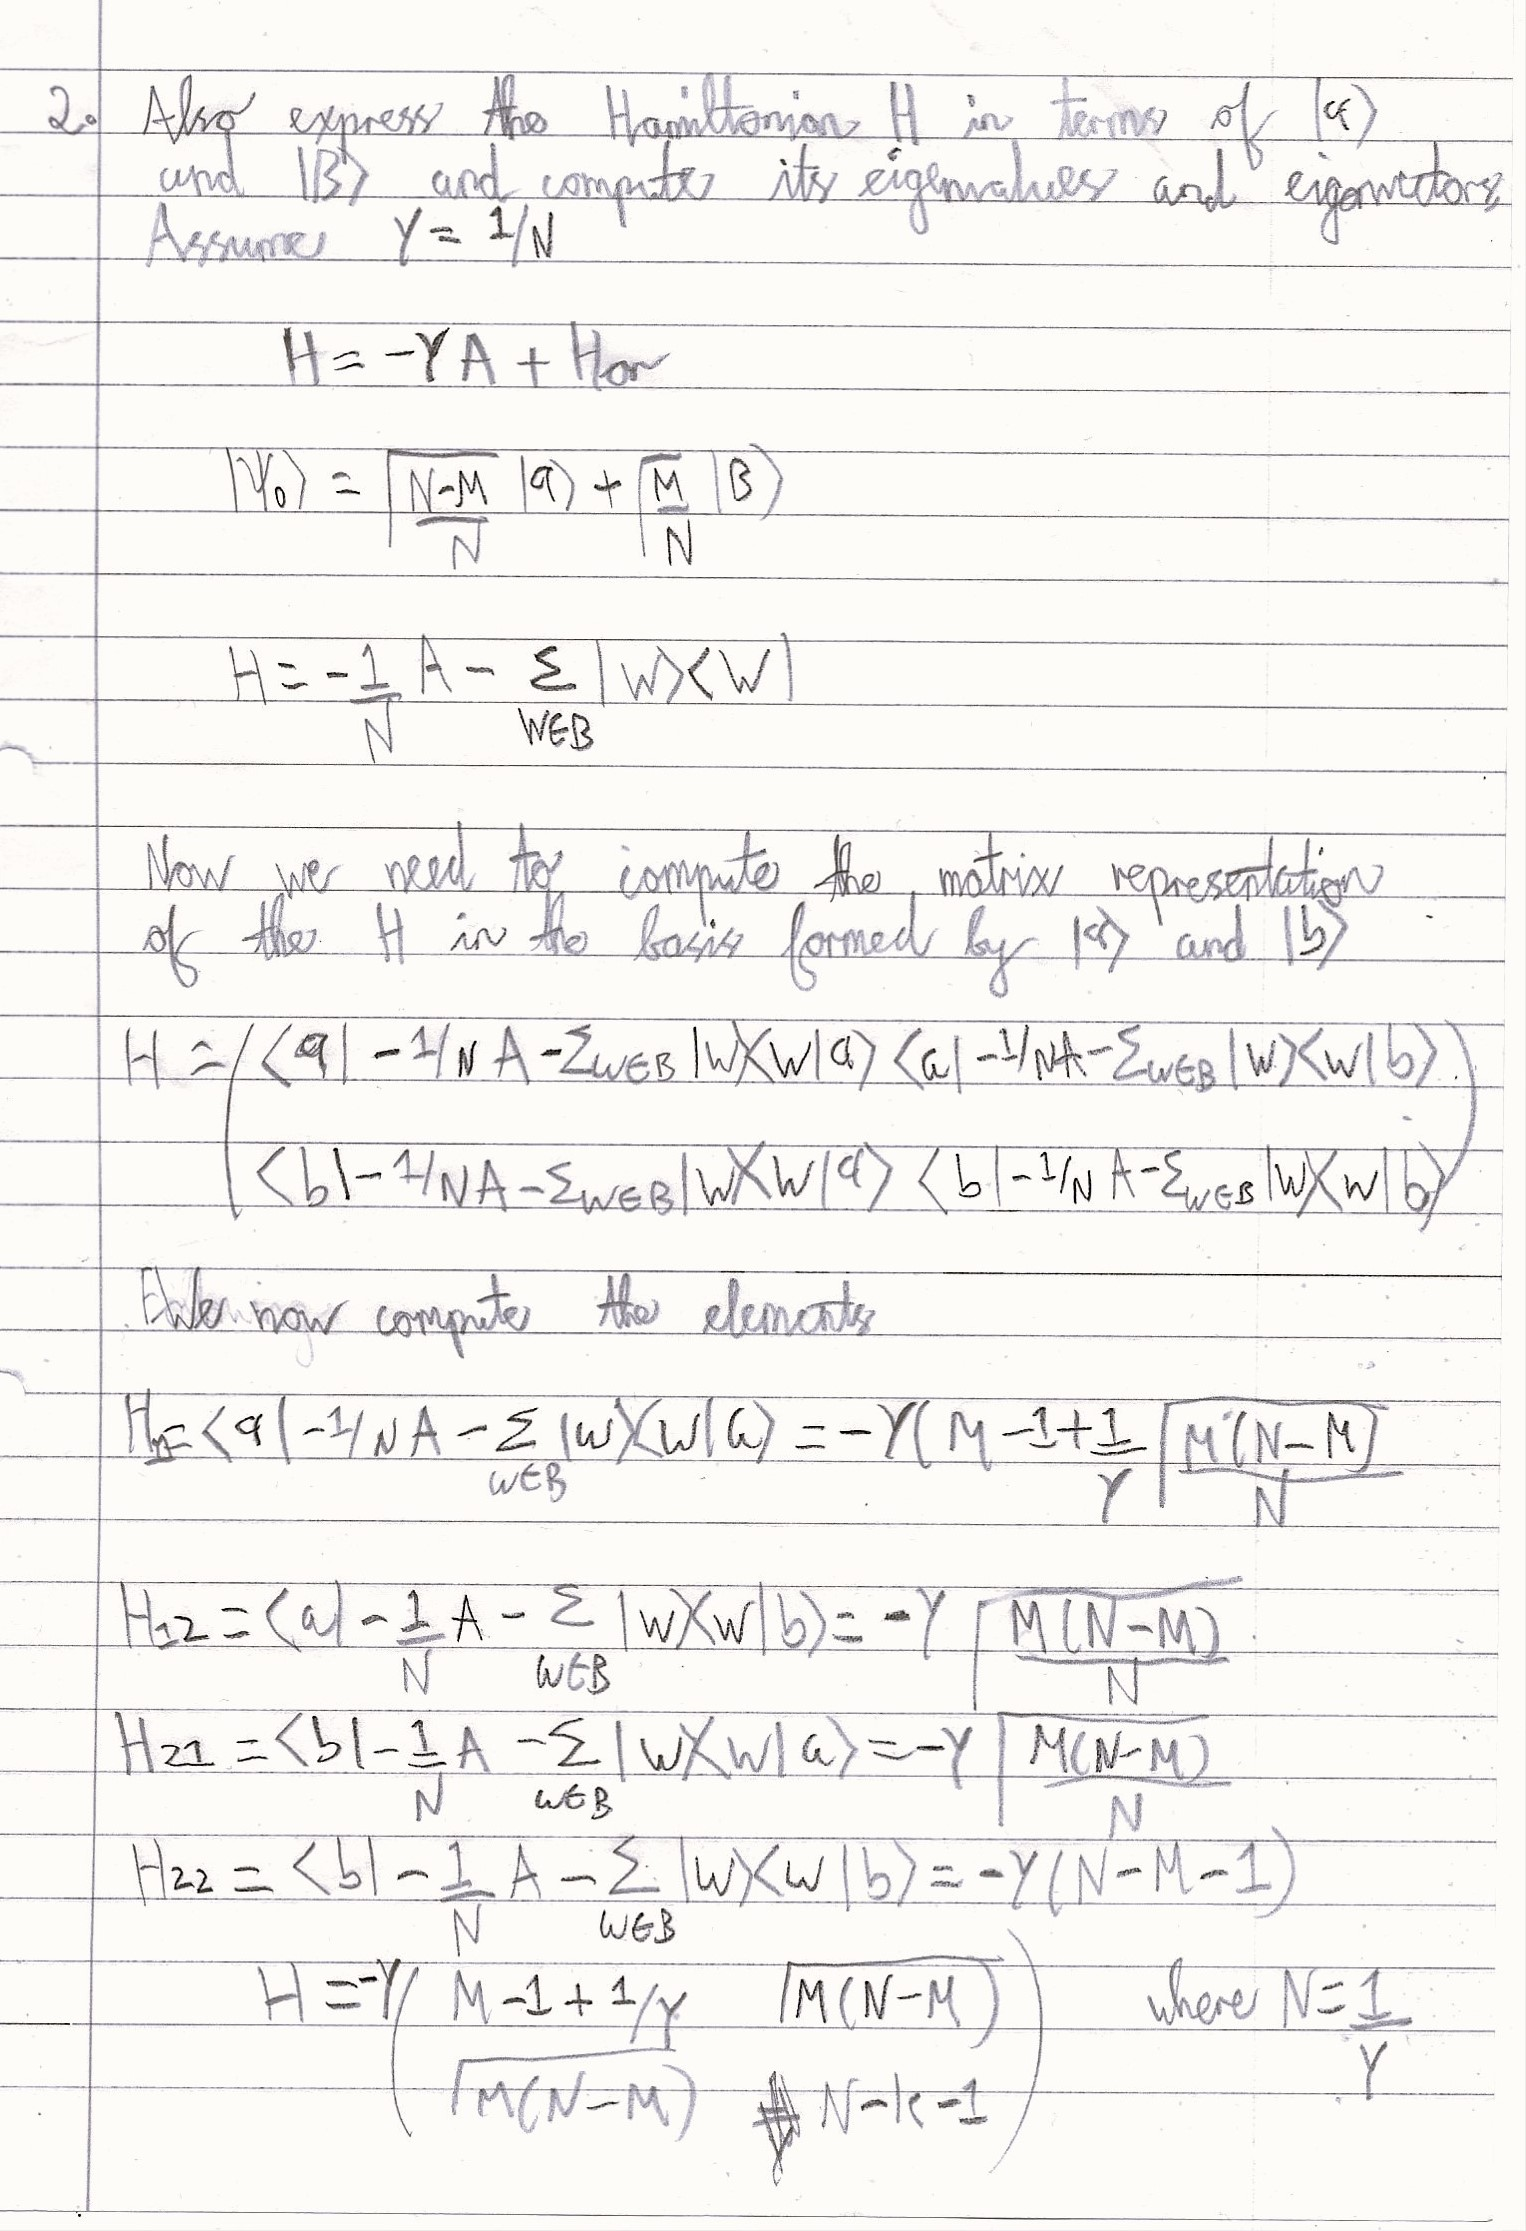

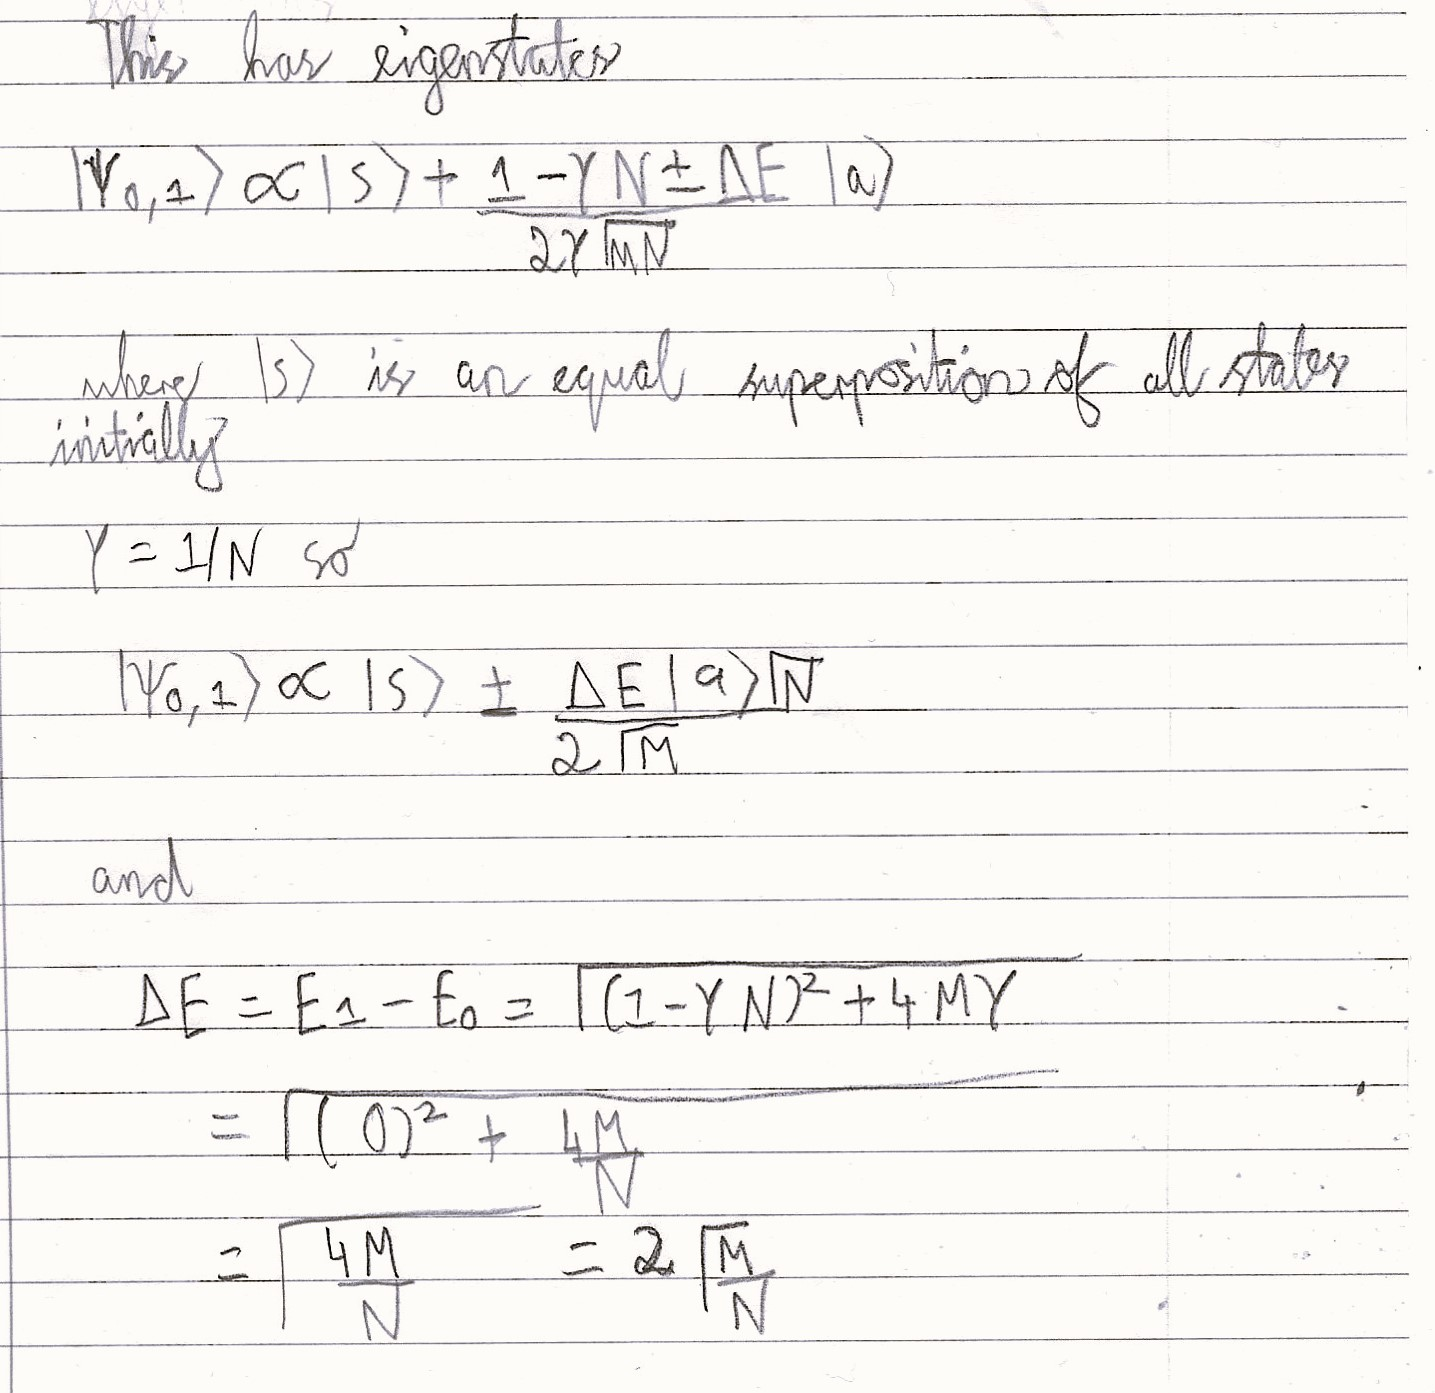

## 4.3.d Grover time (2 pts.)
Write explicitly the time evolution of the state $\ket{\psi_0}$ under the Hamiltonian $\mathcal{H}$, in the space spanned by $\ket{\alpha}$ and $\ket{\beta}$. Determine the Grover time $T_G$, i.e. the time which is necessary to get a state of the system exactly equal to the solution state $\ket{\beta}$.

Describe what happens if the position on graph is measured at time $t=T_G$.

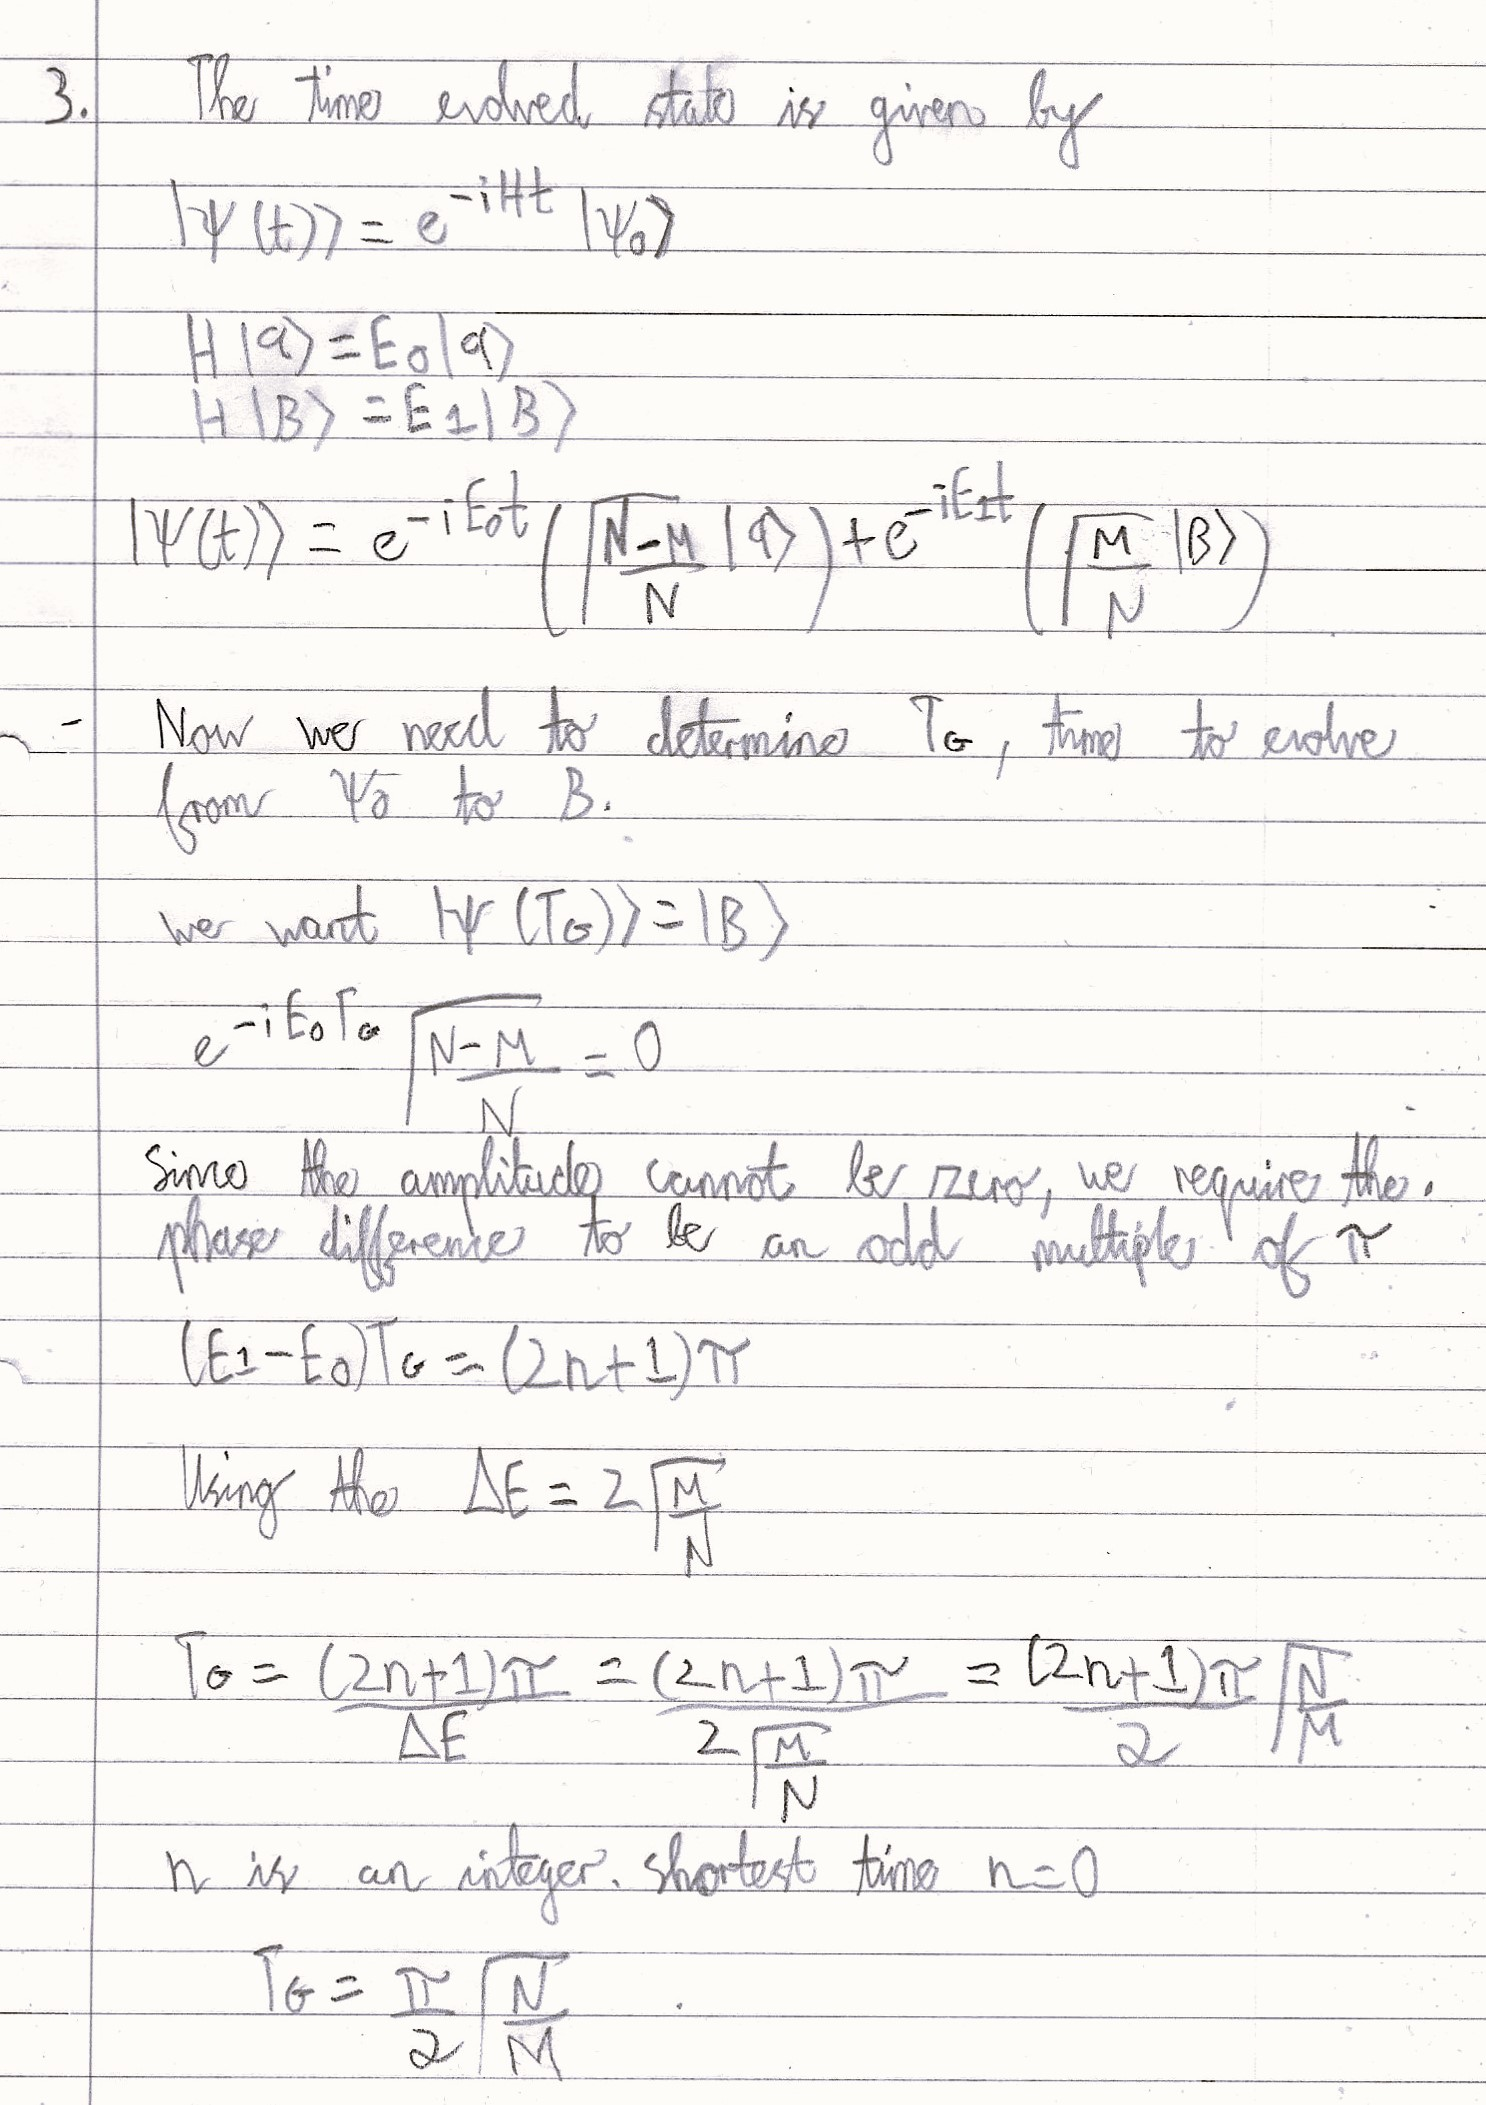

If the position on the graph is measured at time $t=T_G$, the probability of finding the system in the solution state $\ket{\beta}$ is maximized. This is the essence of Grover's search algorithm, which allows us to find the solution state with high probability in a time that scales as the square root of the ratio $\frac{N}{M}$, which is faster than classical search algorithms.

# 4.4 - Looking for collisions (5 pts.)
Let us consider a function $f:\{0,1\}^n \to C$, such that it is 2-to-1: for each $x_j \in \{0,1\}^n$, there exists exactly one other $x_i$ such that $f(x_i) = f(x_j)$. A pair $(x_i, x_j)$ for which $f(x_i) = f(x_j)$ is called a <b>collision</b>. 
<ol>
    <li>Suppose $S$ is a uniformly-randomly chosen set of $s$ elements of $\{0,1\}^n$. What is the probability that there exists a collision in $S$?</li>
    <li>Give a quantum algorithm that finds a collision, with probability greater or equal than $\frac{2}{3}$, using $\mathcal{O}(N^{1/3})$ queries of the function $f$.</li>
</ol>

To find the probability that there exists a collision in $S$, we can use the birthday paradox principle. Let's first find the probability that there is no collision in $S$.
For the first element, there are no previous elements to collide with, so the probability of no collision is 1. For the second element, there are $2^n - 2$ elements left in the domain ${0,1}^n$ that do not collide with the first one (since there is exactly one element that collides with the first one). The probability of no collision for the second element is therefore $\frac{2^n - 2}{2^n - 1}$. Continuing in this way, the probability of no collision for the $s^{th}$ element is $\frac{2^n - 2(s-1)}{2^n - (s-1)}$.

The overall probability of no collisions in the set $S$ is the product of the probabilities for each element:

$$P_{\text{no-collision}} = \prod_{i=0}^{s-1} \frac{2^n - 2i}{2^n - i}$$

Now, the probability of having at least one collision in the set $S$ is the complement of the probability of having no collisions:

$$P_{\text{collision}} = 1 - P_{\text{no-collision}} = 1 - \prod_{i=0}^{s-1} \frac{2^n - 2i}{2^n - i}$$

The quantum algorithm for finding a collision with a probability greater or equal to $\frac{2}{3}$ can be based on the quantum walk algorithm or the Brassard-Hoyer-Tapp algorithm. Here's an outline of the algorithm:
a. Prepare a register of $n$ qubits in the state $\ket{0}$.

b. Prepare another register of qubits to store the output of the function $f$.

c. Apply a Hadamard gate to each qubit in the first register, creating an equal superposition of all possible inputs.

d. Perform an oracle query for the function $f$ to entangle the first and second registers, obtaining a state of the form $\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}\ket{f(x)}$, where $N = 2^n$.

e. Perform a Quantum Fourier Transform (QFT) on the first register.

f. Measure the first register. Due to the properties of the QFT, the probability of measuring a value $y$ is proportional to the square of the absolute value of the inner product of the Fourier basis state $\ket{\tilde{y}}$ and the superposition of input states that lead to the same output value. This means that measuring a state that is more likely to lead to a collision is more probable.

g. Apply the inverse QFT on the first register and perform an oracle query again.

h. Perform a partial swap test on the second register by introducing an ancilla qubit, applying a controlled-SWAP gate with the ancilla as the control, and measuring the ancilla in the Hadamard basis.

i. If the measurement outcome indicates a swap (i.e., a collision), uncompute the oracle query and the inverse QFT on the first register to obtain the colliding pair $(x_i, x_j)$. Otherwise, repeat steps (e) through (h) until a collision is found.

This algorithm is able to find a collision with a probability greater than or equal to $\frac{2}{3}$ using $\mathcal{O}(
N^{1/3})$ queries of the function $f$. The key to this algorithm's efficiency is the use of the QFT to amplify the probability of measuring input states that lead to collisions. By repeating steps (e) through (h), the probability of finding a collision increases, and after $\mathcal{O}(N^{1/3})$ repetitions, the total probability of finding a collision is greater than or equal to $\frac{2}{3}$.

This quantum algorithm provides a significant speedup compared to classical algorithms for finding collisions, which typically require $\mathcal{O}(N^{1/2})$ queries. 

# 4.5 The 5-qubit error correcting code (6 pts.)
In the lecture, we discussed Shor's code, which employs 9 physical qubits to protect one logical qubit from any single-qubit error. It can be shown that it is possible to achieve the same result using a smaller code, consisting of only 5 physical qubits. 

The following is the table of the stabilizers for the 5-qubit code:

|  | qubit 1 | qubit 2 | qubit 3 | qubit 4 | qubit 5 |
| --- | --- | --- | --- | --- | ---|
| $M_1$ | $\sigma_x$ | $\sigma_z$ | $\sigma_z$ | $\sigma_x$ | $\mathbb{I}$ |
| $M_2$ | $\mathbb{I}$ | $\sigma_x$ | $\sigma_z$ | $\sigma_z$ | $\sigma_x$ |
| $M_3$ | $\sigma_x$ | $\mathbb{I}$ | $\sigma_x$ | $\sigma_z$ | $\sigma_z$ |
| $M_4$ | $\sigma_z$ | $\sigma_x$ | $\mathbb{I}$ | $\sigma_x$ | $\sigma_z$ |

<ol>
    <li> Show that any one-qubit error can be corrected by the 5-qubit code. </li>
    <li> Show that there exists (at least) one 2-qubit error that cannot be corrected by the 5-qubit code. </li>
    <li> The encoding of logical operations on a stabiliser code is not unique. One choice for the logical $Z$-gate is given by $Z_L=\sigma_z\otimes\sigma_z\otimes\sigma_z\otimes\sigma_z\otimes\sigma_z$. Suggest a valid encoding for the logical $X$-gate $X_L$ and explain how you obtained it. </li>
</ol>

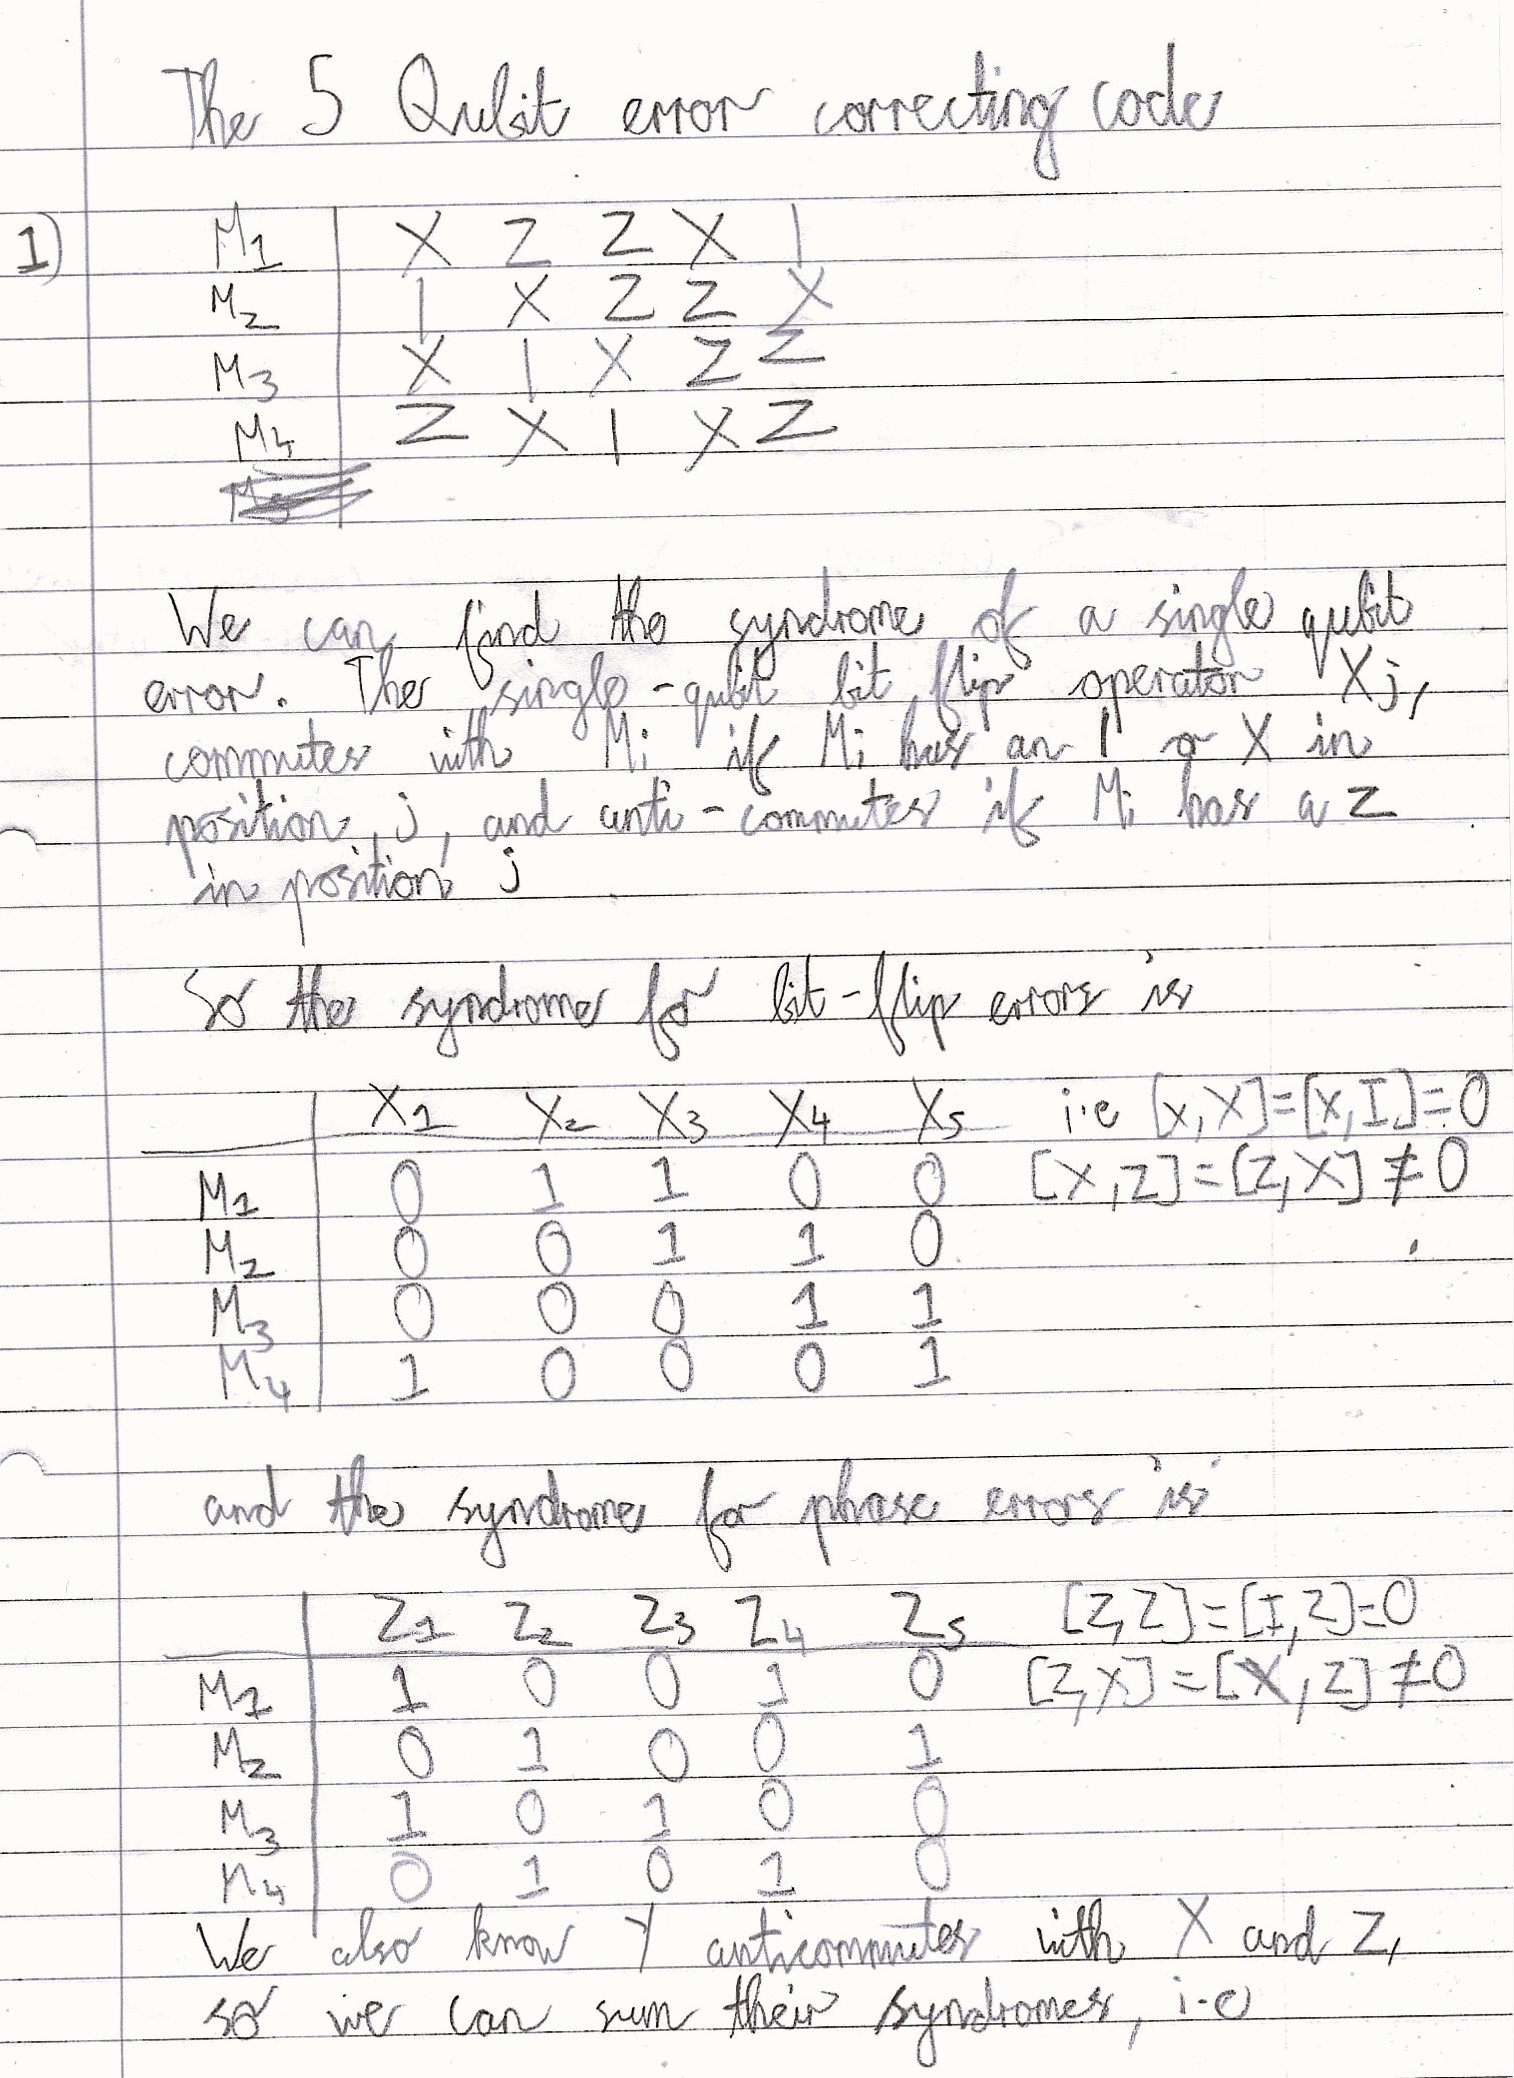

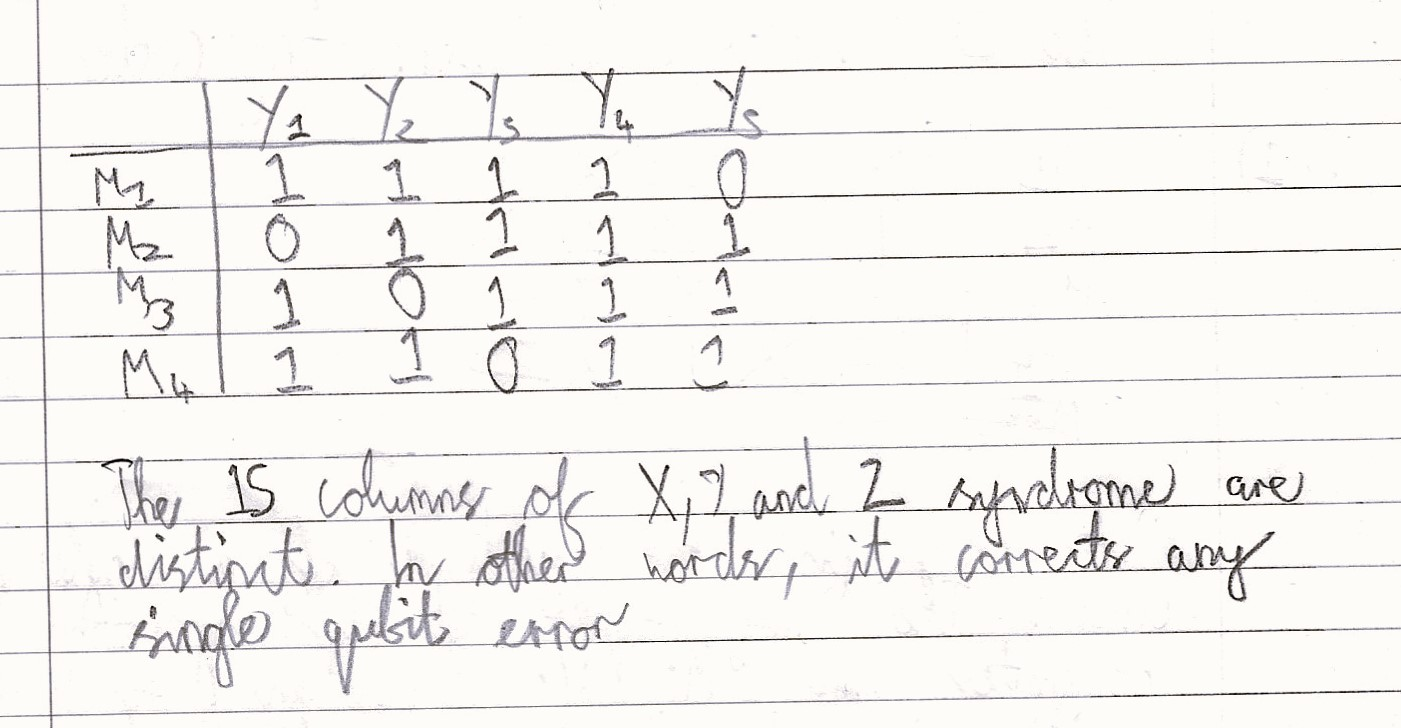

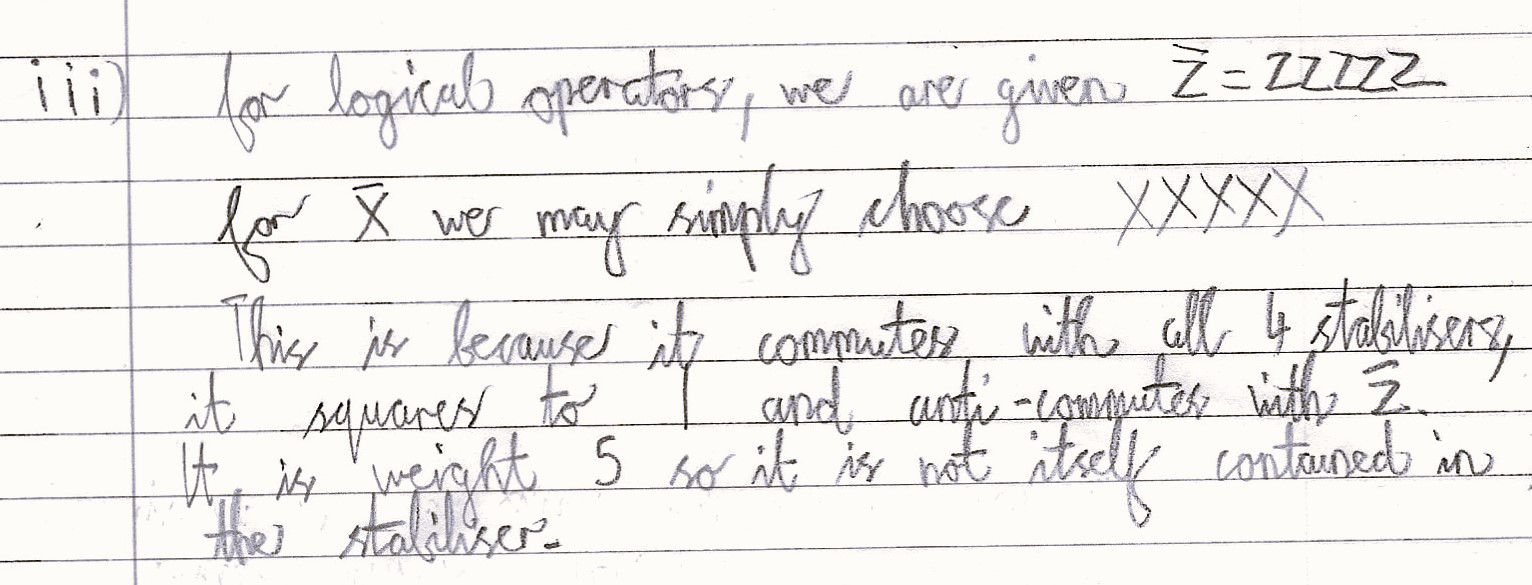